# News Trust: Identifying trustworthy news with NLP



#### NLP-based Fake News Detection and Sentiment Analysis in News Articles

## Introduction

This Final project will aim to build a fake news classifier with a difference. Instead of just indicating whether a news article is fake or not, it will also aim to do the following:

1. News Percentage Accuracy Detection – More than just standard fake news detection, will also show the percentage accuracy.
2. Text classification – Will assign categories to each news article based on its content.
3. Sentiment Analysis – Will be done on each article to determine the emotional tone behind each piece of given text.

# 1. Fake News Detection - More than just standard fake news detection.

Will not only show if the news article is fake or true, but will also show the percentage accuracy.

In recent year the rise of social media took the world by storm. It became increasingly easier to share one’s views and opinions on any matter. People end up getting bombarded with all kinds of information. The need to distinguish between what is accurate and what is fictional, is becoming a bigger and bigger priority. The Aim of this paper is to find out if, through the use of Natural Language Processing, it’s possible to create a classifier that can, to a reasonable degree of accuracy predict weather a news statement is in fact true of false.

In [1]:
# Install all the needed pip packages in the current Jupyter kernel.
import sys
import pip
import pandas as pd
import sklearn
import matplotlib
import seaborn

### The True News Dataset

The following dataset contains True Accurate News artices.

I am making use of a Kaggle dataset. The dataset can be found here:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download&select=True.csv

In [2]:
#Read data from csv and create pd
true_df=pd.read_csv("True.csv") 

#Remove unneeded columns
true_df = true_df.drop(['title','subject','date'], axis = 1) 

true_df

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,MINSK (Reuters) - In the shadow of disused Sov...
21415,MOSCOW (Reuters) - Vatican Secretary of State ...


### The Fake News Dataset

The following dataset contains Fake News artices.

I am making use of a Kaggle dataset. The dataset can be found here:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download&select=Fake.csv

In [3]:
#Read data from csv and create pd
fake_df=pd.read_csv("Fake.csv") 

 #Remove unneeded columns
fake_df = fake_df.drop(['title','subject','date'], axis = 1)

fake_df

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


## Add Both Datasets Together And Shuffle the Full Dataset

In [4]:
fake_df['fake'] = '1'
true_df['fake'] = '0'

frames = [fake_df, true_df]

# Concatenating both dataframes
full_data = pd.concat(frames)

# Shuffle full_data
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data.index = [i for i in range(0,full_data.shape[0])]
full_data

,text,fake
0,"DICK DURBIN: Well Andrea, you ve just complet...",1
1,Thierry Meyssan Voltaire NetIt is a scandal wi...,1
2,WASHINGTON (Reuters) - The U.S. Senate confirm...,0
3,WASHINGTON (Reuters) - Republican and Democrat...,0
4,GENEVA (Reuters) - A U.N. human rights investi...,0
...,...,...
44893,"GREENVILLE, N.C., Va./WASHINGTON (Reuters) - R...",0
44894,BERLIN (Reuters) - Germany must brace itself f...,0
44895,(Reuters) - Late birdies from Thomas Pieters a...,0
44896,ABC News PhotoDaniel Lazare Consortium NewsWh...,1


## Split Full Dataset into Training and Test Set

We added the True and Fake Datasets together and shuffled them to create the Full dataset. The Full dataset comes to 44897 rows. We'll now need to split this dataset into two new datasetes that will make up our **Training** and **Test datasets**. 

The **Training dataset** will be comprised of **80%** of the full dataset and the **Test dataset** will consist of the additional **20%** of the full dataset.

100% of full_data = 44897 rows

80% of full_data = 44897*80/100 = 35917.6 (lets round up to 35918) rows

20% of full_data = 44897 - 35918 = 8979 rows


Thus:

**train_data** = the first 35918 rows

**test_data** = the last 8979 rows


In [5]:
train_data = full_data.iloc[:35918,:]
train_data

,text,fake
0,"DICK DURBIN: Well Andrea, you ve just complet...",1
1,Thierry Meyssan Voltaire NetIt is a scandal wi...,1
2,WASHINGTON (Reuters) - The U.S. Senate confirm...,0
3,WASHINGTON (Reuters) - Republican and Democrat...,0
4,GENEVA (Reuters) - A U.N. human rights investi...,0
...,...,...
35913,HARARE (Reuters) - The leaders of Zimbabwe s r...,0
35914,What a funny guy! I m sure every woman on that...,1
35915,ATHENS (Reuters) - Cyprus on Wednesday said it...,0
35916,Chuck Woolery wants America to return to the 1...,1


In [6]:
test_data = full_data.iloc[8979:,:]
test_data

,text,fake
8979,You ll never guess which mainstream TV network...,1
8980,NEW YORK (Reuters) - Donald Trump lost his soc...,0
8981,MOSCOW (Reuters) - Prominent Russian political...,0
8982,MOSCOW (Reuters) - Russia is ready to consider...,0
8983,SYDNEY (Reuters) - It was supposed to relieve ...,0
...,...,...
44893,"GREENVILLE, N.C., Va./WASHINGTON (Reuters) - R...",0
44894,BERLIN (Reuters) - Germany must brace itself f...,0
44895,(Reuters) - Late birdies from Thomas Pieters a...,0
44896,ABC News PhotoDaniel Lazare Consortium NewsWh...,1


## Classification Approach 

### Multinomial Naive Bayes

We'll make use of a **Multinomial Naive Bayes** classification approach. This differs to the traditional **Gaussian** approach to **Naive Bayes** in that, we assume that the features are generated from a *multinomial distribution*. 

In this approach, we're basically looking at the probability of observing counts across two main categories, namely *fake news* and *accurate news*. We then do our modeling by finding a best-fit multinomial distribution.

*Multinomial Naive Bayes* is a very suitable approach for this type of text classification where we're taking a fragment of text, or a blog post, or a passage of text, and we're trying to classify it according to some topical scheme. 

In this problem, the inside the two categories we are essentially looking at the word types, so all the different words that you might have in your vocabulary, data types and data categories. We then make use of the multinomial distribution to basically observing the counts across these various word types. 

### TfidfVectorizer

When dealing with textual data, one can't use it in it's raw form in one's models. We have to convert it to some numerical form, and one of the best ways of doing this by using approach which is called the TfidfVectorizer.

In the following blocks of code we'll make use of a TfidfVectorizer. We'll then import multinomial Naive Bayes(MultinomialNB) as our model. We'll put these two objects into a pipeline (make_pipeline). 
We will fit training data to the model, and then generate some labels by calling the predict method on the test data.

In [7]:
# Convert to a numerical vector

# Import Needed Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [8]:
# Apply model to the training data, then predict
model.fit(train_data.text, train_data.fake)
labels = model.predict(test_data.text)

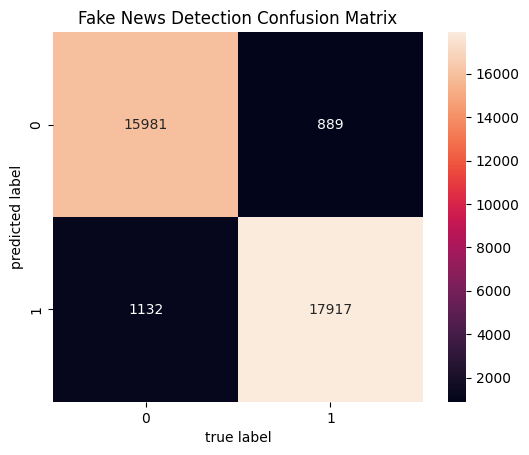

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     17113
           1       0.94      0.95      0.95     18806

    accuracy                           0.94     35919
   macro avg       0.94      0.94      0.94     35919
weighted avg       0.94      0.94      0.94     35919



In [9]:
# Visualize the performance using a confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
mat = confusion_matrix(test_data.fake, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', xticklabels='auto', yticklabels='auto')
plt.title('Fake News Detection Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print(classification_report(test_data.fake, labels))

In [10]:
# Create a utility to categorise whether a news story is True or Fake
def predict_news_True_or_False(s, train_data=train_data, model = model):
    pred = model.predict([s])
    if pred == ['1']:
        print('Fake News')
    elif pred == ['0']:
        print('True News')

In [11]:
# These are fake news headings
predict_news_True_or_False('Avril Lavigne conspiracy theory - star died 15 years ago and was replaced by an actress')
predict_news_True_or_False("Princess Diana and King Charles III's secret daughter is named Sarah, allegedly")
predict_news_True_or_False('donald trump want to undergo an operation to turn himself into a giraffe')
predict_news_True_or_False('barack obama and lady gaga are the same person')


# These are true news heading
predict_news_True_or_False('The West is struggling to set an oil price cap that hurts Russia')
predict_news_True_or_False('CIA director met with Russian counterpart to manage nuclear risks, US diplomat says')




Fake News
Fake News
Fake News
Fake News
True News
True News


In [12]:
# Full True News Article
true_news_articles_text = '''Hamas political leader says Blinken should be "more focused" on ending Israeli "aggression" in Gaza   
From CNN's Niamh Kennedy

The head of Hamas' political bureau, Ismail Haniyeh, says he hopes US Secretary of State Antony Blinken will be "more focused" on ending Israeli "aggression" in Gaza during the top diplomat's multi-country visit to the region.

Blinken is undertaking another shuttle diplomacy tour amid heightened fears that the Israel-Hamas war may spill over into a wider regional conflict. Attacks in Lebanon, Iran and Iraq this week have spiked tensions in the region as Iranian proxy groups Hezbollah and the Houthis increase their threats against Israel.  

In a video message shared by Hamas on Saturday, the Doha-based Hamas political leader said he hopes the US has "realized the extent" of its "mistakes" in supporting Israel.   

Haniyeh said Hamas hopes Blinken — in his fourth trip to the region since Hamas' attacks on Israel on October 7, 2023 — will be "more focused this time to end the aggression" being carried out by Israel in the Gaza Strip.  

Earlier this week, Israel's Defense Minister Yoav Gallant unveiled the third phase of the war campaign in Gaza, which includes a new combat approach in the north and a commitment to keep pursuing Hamas leaders in southern Gaza for "for as long as necessary."  

Haniyeh also said that leaders of Arab nations who meet Blinken should "stress to the US administration that the future and stability" of the region is linked to the "Palestinian cause."   

He reiterated Hamas' view that the Palestinian people should have a "completely independent state" with "complete sovereignty."  

More on Blinken's trip: Indirect back-channeling to Iran will also be a key focus of Blinken's trip, a senior State Department official said Friday.nThe top US diplomat will make clear to the leaders with whom he meets that the US does not want to see the conflict escalate nor do they intend to escalate it. The US expects that message to then be conveyed to Iran and Iranian proxies through the countries that have a relationship with them, the official said.

The secretary of state met with Turkey's President Recep Tayyip Erdogan. After going to Greece, he will travel to Jordan, Qatar, the UAE, Saudi Arabia, Israel, the West Bank, and Egypt. '''



predict_news_True_or_False(true_news_articles_text)

True News


In [13]:
# Full Fake News Article
fake_news_articles_text = '''Michael Jackson is alive and planning a new UK tour, bizarrely claim a selection of his closest pals and collaborators.

The King Of Pop – whose family is currently disputing multiple child abuse accusations against him – could be in hiding and hoping to return to the music scene one day, according to his former stylist, Steve Erhardt.

Addressing the growing group of "believers," who think Michael didn't actually die on June 25, 2009, Steve teased that they might just be onto something.

"You heard it here first, an announcement of sorts," he wrote on social media. “And in a couple of months, or latest at the end of the year, you will be receiving some very good news.

“It’s almost unbelievable. And not even the family knows… but I do.”

While Ernhardt never disclosed what the news would be, he further fuelled rumours in June last year, as he shared a very mysterious picture on social media.

Snapping the leg of a man who sported Jack's famous white socks and baggy black trousers, he wrote: "In a recording studio, somewhere in the world, in an undisclosed location".

Sending fans into a frenzy, he cryptically signed off: "He's coming soon".

However, despite Steve's promises, there has still been no revival.

Steve isn't the only person close to Michael to trigger an outlandish theory, as producer Teddy Riley, who worked with him on the Dangerous album, shockingly admitted he also wouldn't rule out conspiracy theories suggesting Michael was still alive.

In 2010, a year after reports of his passing, he tweeted: “If people can think Elvis is still alive why the F#*@ I cant [sic] think Michael is still alive."

"Akon said he believes Michael is in hiding and will be coming back one day. Im curious to know what ya think bout that," they wrote, triggering the producer's surprising response.

"Akon is my friend and we think alike," he added at the time.

Producer Akon also is said to have had a close relationship with Michael Jackson, even releasing a tribute song entitled Cry Out Of Joy after his passing.

While MJ was alive, Akon also recorded a mix of Wanna Be Startin' Somethin' for the 25th anniversary release of his album, Thriller.

When Michael Jackson's death was announced in 2009, several people were so grief stricken that they refused to accept that he was really dead.

'''


predict_news_True_or_False(fake_news_articles_text)

Fake News


In [14]:
# The following function will display the percentage likelihood 
# that an article is fake or true.

def predict_percentage_news_True_or_False(s, train_data=train_data, model=model):
    # Get the probabilities
    probabilities = model.predict_proba([s])[0]  # Assuming the first entry is the required one

    # Extract probabilities for each class
    prob_fake = probabilities[1]  # Assuming '1' is the label for Fake News
    prob_true = probabilities[0]  # Assuming '0' is the label for True News

    # Print the probabilities
    print()
    print(f"Probability of being Fake News: {prob_fake * 100:.2f}%")
    print(f"Probability of being True News: {prob_true * 100:.2f}%")
    print()

In [15]:
# These are fake news headings
predict_percentage_news_True_or_False('Avril Lavigne conspiracy theory - star died 15 years ago and was replaced by an actress')
predict_percentage_news_True_or_False("Princess Diana and King Charles III's secret daughter is named Sarah, allegedly")
predict_percentage_news_True_or_False('donald trump want to undergo an operation to turn himself into a giraffe')
predict_percentage_news_True_or_False('barack obama and lady gaga are the same person')


# These are true news heading
predict_percentage_news_True_or_False('The West is struggling to set an oil price cap that hurts Russia')
predict_percentage_news_True_or_False('CIA director met with Russian counterpart to manage nuclear risks, US diplomat says')

predict_percentage_news_True_or_False(true_news_articles_text)
predict_percentage_news_True_or_False(fake_news_articles_text)


Probability of being Fake News: 87.92%
Probability of being True News: 12.08%


Probability of being Fake News: 83.69%
Probability of being True News: 16.31%


Probability of being Fake News: 68.94%
Probability of being True News: 31.06%


Probability of being Fake News: 92.47%
Probability of being True News: 7.53%


Probability of being Fake News: 26.10%
Probability of being True News: 73.90%


Probability of being Fake News: 12.55%
Probability of being True News: 87.45%


Probability of being Fake News: 0.29%
Probability of being True News: 99.71%


Probability of being Fake News: 99.23%
Probability of being True News: 0.77%



I'm just making a slight change to thiese function, so that it will return the variables instead of printing them.

In [16]:
def predict_news_True_or_False(s, train_data=train_data, model = model):
    pred = model.predict([s])
    if pred == ['1']:
        return('Fake News')
    elif pred == ['0']:
        return('True News')

def predict_percentage_news_True_or_False(s, train_data=train_data, model=model):
    # Get the probabilities
    probabilities = model.predict_proba([s])[0]  # Assuming the first entry is the required one

    # Extract probabilities for each class
    prob_fake = probabilities[1]  # Assuming '1' is the label for Fake News
    prob_true = probabilities[0]  # Assuming '0' is the label for True News
    
    return prob_fake, prob_true

# 2.**Text classification** – Will assign categories to each news article based on its content.

In [17]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I desided to use the following dataset from Kaggle to train my text classifier.
https://www.kaggle.com/datasets/rmisra/news-category-dataset?resource=download


Convert our data file to csv.

In [18]:
import json
import csv

input_filename = 'News_Category_Dataset_v3.json'
output_filename = 'News_Category_Dataset_v3.csv'

# The fields we want to extract
fields = ['link', 'headline', 'category', 'short_description', 'authors', 'date']

with open(input_filename, 'r', encoding='utf-8') as jsonfile, open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.DictWriter(csvfile, fieldnames=fields)
    csvwriter.writeheader()
    
    for line in jsonfile:
        # Parse the JSON line
        json_data = json.loads(line)
        
        # Write the relevant fields to the CSV
        csvwriter.writerow({field: json_data.get(field, '') for field in fields})

print(f"CSV file '{output_filename}' has been created successfully.")


CSV file 'News_Category_Dataset_v3.csv' has been created successfully.


In [19]:
import pandas as pd

news_category_datase = pd.read_csv("News_Category_Dataset_v3.csv")
news_category_datase.shape

(209527, 6)

### Limit the 42 Categories to the following 4

> POLITICS

> ENTERTAINMENT

> BUSINESS

> SPORTS

In [20]:
import pandas as pd

def filter_categories_and_create_csv(input_filepath, output_filepath):
    # Load the dataset
    df = pd.read_csv(input_filepath)
    
    # Define the categories to keep
    categories_to_keep = ['POLITICS', 'ENTERTAINMENT', 'BUSINESS', 'SPORTS']
    
    # Filter the dataframe to include only the specified categories
    filtered_df = df[df['category'].isin(categories_to_keep)]
    
    # Write the filtered dataframe to a new csv file
    filtered_df.to_csv(output_filepath, index=False)
    
    print(f"CSV file '{output_filepath}' has been created successfully.")
    

input_filepath  = 'News_Category_Dataset_v3.csv'
output_filepath = 'News_Category_Dataset_v3_Top_4.csv'

filter_categories_and_create_csv(input_filepath, output_filepath)

CSV file 'News_Category_Dataset_v3_Top_4.csv' has been created successfully.


In [21]:
# Import the dataset :

dataset = pd.read_csv("News_Category_Dataset_v3_Top_4.csv")

In [22]:
# Check the shape (row and column) of the dataset :

dataset.shape

(64033, 6)

### Clean Data

In [23]:
import pandas as pd

# Check for string type and keep rows where both 'link' and 'short_description' are strings
# This is achieved by using the applymap function to check for string type across these columns and then filtering with all(axis=1)
cleaned_dataset = dataset[
    dataset[['headline', 'short_description']].applymap(lambda x: isinstance(x, str)).all(axis=1)
]

# Save the cleaned dataset back to a CSV file or continue processing
cleaned_dataset.to_csv('News_Category_Dataset_v3_Top_4_cleaned.csv', index=False)

print("Data cleaning complete. Non-string entries in 'link' or 'short_description' have been removed.")


Data cleaning complete. Non-string entries in 'link' or 'short_description' have been removed.


In [24]:
# Import the dataset :

dataset = pd.read_csv("News_Category_Dataset_v3_Top_4_cleaned.csv")

In [25]:
# Check the shape (row and column) of the dataset :

dataset.shape

(56761, 6)

In [26]:
# Count Values of Categories

dataset['category'].value_counts()

POLITICS         32441
ENTERTAINMENT    14774
BUSINESS          5132
SPORTS            4414
Name: category, dtype: int64

In [27]:
# Convert Categories Name into Numerical Index:

target_category = dataset['category'].unique()
print(target_category)    

['SPORTS' 'ENTERTAINMENT' 'POLITICS' 'BUSINESS']


In [28]:
dataset['CategoryId'] = dataset['category'].factorize()[0]
dataset.head()

,link,headline,category,short_description,authors,date,CategoryId
0,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,0
1,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",NaN,2022-09-20,1
2,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,NaN,2022-09-19,2
3,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,2
4,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,0


In [29]:
# Show Category’s Name w.r.t Category ID

category = dataset[['category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
print(category)

         category  CategoryId
0          SPORTS           0
1   ENTERTAINMENT           1
2        POLITICS           2
70       BUSINESS           3


### Visualizing Data

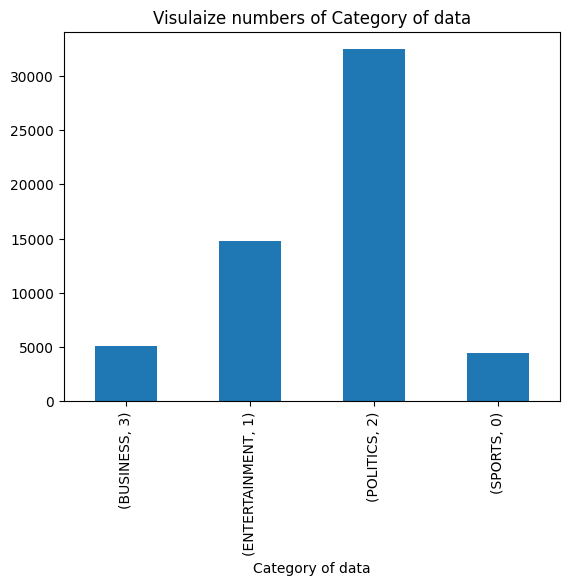

In [30]:
# The below graph shows the news article count for category from our dataset.

dataset.groupby('category').CategoryId.value_counts().plot(kind = "bar")
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

### Visualizing Category Related Words


In this instance, we utilize the word cloud technique to depict words pertinent to various categories.

The word cloud serves as a visual representation method for text, where the size of a word is proportional to its frequency or relevance. It is an effective way to spotlight important text data points. Word clouds are frequently used to analyze content from social media sites.

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Assuming 'dataset' is your DataFrame containing the text data
# Update your stopwords set to include any category-specific words you want to exclude
stop = set(stopwords.words('english')) | {'news', 'headline'}

def generate_wordcloud_for_category(dataset, category_id, color='white'):
    # Filter the dataset for the specific category using 'CategoryId'
    category_data = dataset[dataset['CategoryId'] == category_id]['headline']
    # Join all texts within the category into a single string
    words = ' '.join(category_data)
    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stop, background_color=color, width=2500, height=2500).generate(words)
    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Dynamically create the category_names dictionary from your dataset
# Assuming 'category' is a column in your dataset corresponding to the category name
category_names = {row['CategoryId']: row['category'] for index, row in dataset.drop_duplicates(subset=['CategoryId']).iterrows()}


In [32]:
# Show Text Column of Dataset:
    
text = dataset["headline"]
text.head(10)

0    Maury Wills, Base-Stealing Shortstop For Dodge...
1    Golden Globes Returning To NBC In January Afte...
2    Biden Says U.S. Forces Would Defend Taiwan If ...
3    ‘Beautiful And Sad At The Same Time’: Ukrainia...
4    Las Vegas Aces Win First WNBA Title, Chelsea G...
5    James Cameron Says He 'Clashed' With Studio Be...
6    Biden Says Queen's Death Left 'Giant Hole' For...
7    Amazon Greenlights 'Blade Runner 2099' Limited...
8    Bill To Help Afghans Who Escaped Taliban Faces...
9    'The Phantom Of The Opera' To Close On Broadwa...
Name: headline, dtype: object

In [33]:
# Show Category Column of Dataset

category = dataset['category']
category.head(10)

0           SPORTS
1    ENTERTAINMENT
2         POLITICS
3         POLITICS
4           SPORTS
5    ENTERTAINMENT
6         POLITICS
7    ENTERTAINMENT
8         POLITICS
9    ENTERTAINMENT
Name: category, dtype: object

### Remove All Tags

In [34]:
# First, we remove all tags which are present in our given dataset 

def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)

dataset['headline'] = dataset['headline'].apply(remove_tags)

### Remove Special Characters

In [35]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews


dataset['headline'] = dataset['headline'].apply(special_char)

### Convert Everything to Lower Case

In [36]:
def convert_lower(text):
    return text.lower()

dataset['headline'] = dataset['headline'].apply(convert_lower)
dataset['headline'][1]

'golden globes returning to nbc in january after year off air'

### Remove all Stopwords

In [37]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

dataset['headline'] = dataset['headline'].apply(remove_stopwords)
dataset['headline'][1]

['golden', 'globes', 'returning', 'nbc', 'january', 'year', 'air']

### Lemmatizing the Words

In [38]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Make sure you've downloaded the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define the lemmatization function with tokenization
def lemmatize_word(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        print(f"Expected string, got {type(text)}")
        return text
    wordnet = WordNetLemmatizer()
    words = word_tokenize(text)
    return " ".join([wordnet.lemmatize(word) for word in words])

# Apply the lemmatization function
dataset['headline'] = dataset['headline'].apply(lemmatize_word)
print(dataset['headline'][0])


Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 'list'>
Expected string, got <class 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### View the dataset after cleaning

In [39]:
dataset

,link,headline,category,short_description,authors,date,CategoryId
0,https://www.huffpost.com/entry/dodgers-basebal...,"[maury, wills, base, stealing, shortstop, dodg...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,0
1,https://www.huffpost.com/entry/golden-globes-r...,"[golden, globes, returning, nbc, january, year...",ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",NaN,2022-09-20,1
2,https://www.huffpost.com/entry/biden-us-forces...,"[biden, says, u, forces, would, defend, taiwan...",POLITICS,President issues vow as tensions with China rise.,NaN,2022-09-19,2
3,https://www.huffpost.com/entry/ukraine-festiva...,"[beautiful, sad, time, ukrainian, cultural, fe...",POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,2
4,https://www.huffpost.com/entry/2022-wnba-final...,"[las, vegas, aces, win, first, wnba, title, ch...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,0
...,...,...,...,...,...,...,...
56756,https://www.huffingtonpost.com/entry/girl-with...,"[girl, dragon, tattoo, india, release, cancele...",ENTERTAINMENT,"""Sony Pictures will not be releasing The Girl ...",NaN,2012-01-28,1
56757,https://www.huffingtonpost.com/entry/maria-sha...,"[maria, sharapova, stunned, victoria, azarenka...",SPORTS,"Afterward, Azarenka, more effusive with the pr...",NaN,2012-01-28,0
56758,https://www.huffingtonpost.com/entry/super-bow...,"[giants, patriots, jets, colts, among, improba...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",NaN,2012-01-28,0
56759,https://www.huffingtonpost.com/entry/aldon-smi...,"[aldon, smith, arrested, 49ers, linebacker, bu...",SPORTS,CORRECTION: An earlier version of this story i...,NaN,2012-01-28,0


### Declared Dependent and Independent Value

In [40]:
x = dataset['headline']
y = dataset['CategoryId']

### Create and Fit Bag of Words Model

In this phase, we create a vector to identify if a word within a sentence is common. If it is, we mark it with a 1; if not, we mark it with a 0.

In the realm of Natural Language Processing (NLP), algorithms operate on numerical data. Directly inputting text into these algorithms is not feasible. Therefore, the Bag of Words approach is utilized to prepare the text for processing. This method transforms the text into a collection of words, tallying how often the most commonly used words appear.

In [41]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Convert each entry in 'headline' to a string if it's not already
dataset['headline'] = dataset['headline'].astype(str)

x = np.array(dataset.iloc[:, 0].values)
y = np.array(dataset['CategoryId'].values)

cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(dataset['headline']).toarray()

print("X.shape = ", x.shape)
print("y.shape = ", y.shape)


X.shape =  (56761, 5000)
y.shape =  (56761,)


### Train Test and Split the Dataset

To assess the effectiveness of our machine learning model, it's essential to divide our dataset into training and testing sets. The training set is employed to train the model, and we are familiar with its statistics. The other portion is referred to as the test dataset, which is exclusively utilized for making predictions.

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

print(len(x_train))
print(len(x_test))

39732
17029


### Create Empty List

In [43]:
# Create list of model and accuracy dicts
perform_list = [ ]

### Create, Fit and Predict all ML Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression(C=est_c if est_c else 1.0, penalty=est_pnlty if est_pnlty else 'l2', max_iter=1000, verbose=1, n_jobs=-1)
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0, verbose=1, n_jobs=5)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifier':
        mdl = SVC(verbose=True)
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl, n_jobs=-1)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))

### Logistic Regression

In [45]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 87.41
Precision : 0.8740971284279758
Recall : 0.8740971284279758
F1-score : 0.8740971284279758


### Random Forest

In [46]:
run_model('Random Forest', est_c=None, est_pnlty=None)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s


Test Accuracy Score of Basic Random Forest: % 85.6
Precision : 0.8559516119560749
Recall : 0.8559516119560749
F1-score : 0.8559516119560749


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.5s finished


### Multinomial Naive Bayes

In [47]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 87.65
Precision : 0.8765047859533737
Recall : 0.8765047859533737
F1-score : 0.8765047859533737


### Support Vector Machine

In [48]:
run_model('Support Vector Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifier: % 87.71
Precision : 0.8770920194961537
Recall : 0.8770920194961537
F1-score : 0.8770920194961537


### Decision Tree

In [49]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 74.61
Precision : 0.7461389394562218
Recall : 0.7461389394562218
F1-score : 0.7461389394562218


### Gaussian Naive Bayes

In [50]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 63.2
Precision : 0.6319807387397968
Recall : 0.6319807387397968
F1-score : 0.6319807387397968


### Create Dataframe of Model, Accuracy, Precision, Recall and F1

In [51]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,87.41,0.87,0.87,0.87
1,Random Forest,85.60,0.86,0.86,0.86
2,Multinomial Naive Bayes,87.65,0.88,0.88,0.88
3,Support Vector Classifier,87.71,0.88,0.88,0.88
4,Decision Tree Classifier,74.61,0.75,0.75,0.75
5,Gaussian Naive Bayes,63.20,0.63,0.63,0.63


In [52]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"form Multinomial Naive Bayes	")

The best accuracy of model is 87.71 form Multinomial Naive Bayes	


### Fit & predict best ML Model

Here we fit and predict our best model i.e. Multinomial Naive Bayes.

In [53]:
classifier = MultinomialNB(alpha=1.0,fit_prior=True).fit(x_train, y_train)
y_pred = classifier.predict(x_test)

### Best Model to Perform Accuracy Score


Upon training and evaluating the model, it was discovered that the Multinomial Naive Bayes outperformed all other machine learning models in terms of accuracy.

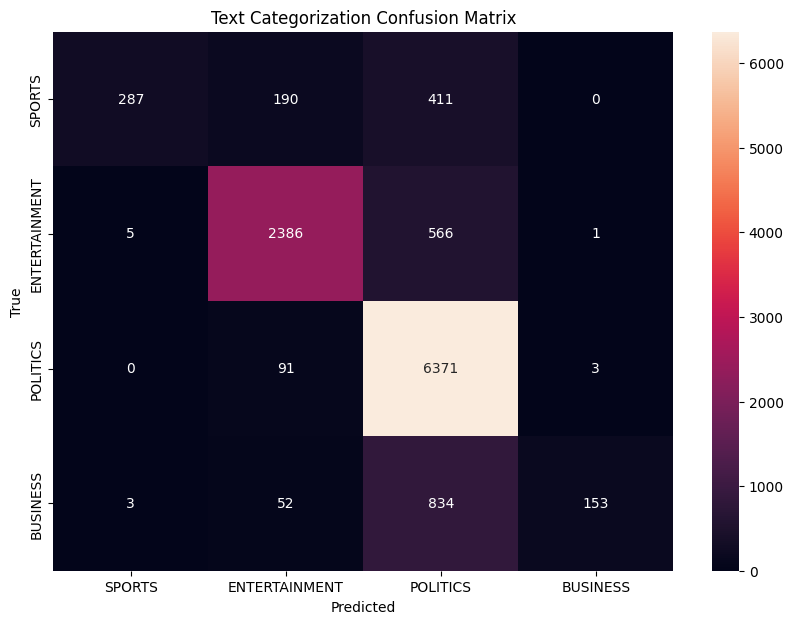

               precision    recall  f1-score   support

     BUSINESS       0.97      0.15      0.26      1042
ENTERTAINMENT       0.88      0.81      0.84      2958
     POLITICS       0.78      0.99      0.87      6465
       SPORTS       0.97      0.32      0.49       888

     accuracy                           0.81     11353
    macro avg       0.90      0.57      0.61     11353
 weighted avg       0.84      0.81      0.78     11353



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing the dataset
X = dataset['headline']
y = dataset['category']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline that first converts the text data into TF-IDF vectors and then trains a classifier
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB(alpha=1.0,fit_prior=True))

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Generating and plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['SPORTS', 'ENTERTAINMENT', 'POLITICS', 'BUSINESS'])

plt.figure(figsize=(10, 7))
plt.title('Text Categorization Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['SPORTS', 'ENTERTAINMENT', 'POLITICS', 'BUSINESS'], yticklabels=['SPORTS', 'ENTERTAINMENT', 'POLITICS', 'BUSINESS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing the classification report
print(classification_report(y_test, y_pred))


The data from the classification report provides several insights into the performance of my model across the different categories (`BUSINESS`, `ENTERTAINMENT`, `POLITICS`, `SPORTS`). Here's what the key metrics tell us:

### Precision
- **Precision** measures the accuracy of positive predictions. That is, of all the instances the model predicted for a category, how many were actually correct.
    - The model has very high precision for `BUSINESS` (0.97) and `SPORTS` (0.97), meaning that when it predicts something as belonging to these categories, it's very likely to be correct.
    - `ENTERTAINMENT` and `POLITICS` also have good precision scores (0.88 and 0.78, respectively), indicating the model's predictions are reliable across all categories.

### Recall
- **Recall** measures the ability of the model to find all the actual positives. That is, of all the actual instances of a category, how many did the model correctly identify.
    - The recall for `POLITICS` is exceptionally high (0.99), indicating that the model is very effective at identifying articles in this category.
    - `ENTERTAINMENT` has a decent recall (0.81), but `BUSINESS` (0.15) and `SPORTS` (0.32) have low recall, indicating the model struggles to identify all the relevant instances for these categories.

### F1-Score
- **F1-score** is the harmonic mean of precision and recall, providing a single metric to assess the balance between them. A higher F1-score indicates better model performance.
    - `POLITICS` has the highest F1-score (0.87), followed by `ENTERTAINMENT` (0.84), indicating strong performance in these categories.
    - `BUSINESS` and `SPORTS` have low F1-scores (0.26 and 0.49, respectively), mainly due to their low recall rates. Despite the high precision, the model's inability to identify most of the relevant instances for these categories significantly impacts its F1-score.

### Support
- **Support** is the number of actual occurrences of the class in the dataset. It is not a performance metric but provides context for the other metrics.
    - The dataset contains a large number of `POLITICS` articles (6465) and a moderate number of `ENTERTAINMENT` articles (2958). In contrast, `BUSINESS` (1042) and `SPORTS` (888) categories have fewer instances.

### Overall Observations
- What I've learned is that the model is highly proficient at identifying `POLITICS` articles, with high precision and recall, suggesting that the features distinguishing this category are well-captured by the model.
- Despite high precision for `BUSINESS` and `SPORTS`, the low recall indicates the model is missing a significant number of articles in these categories. This might be due to these categories being underrepresented in the dataset, the model's features not adequately capturing the characteristics of these categories, or similarities between these categories and others leading to misclassification.
- The `macro avg` and `weighted avg` values give a sense of overall model performance across categories, with the `weighted avg` accounting for the imbalance in the dataset. The `macro avg` F1-score (0.61) suggests room for improvement, especially in enhancing recall for underperforming categories.
- The model's `accuracy` (0.81) is relatively high, but this metric can be misleading in imbalanced datasets. The high accuracy is largely driven by the model's performance in the `POLITICS` category, which has the most samples.


### Predict News Article

Now, here, after the completion of model analysis, we can also predict any news articles.

In [55]:
news_article = 'Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'


def predict_news_category(news_article):
    y_pred1 = cv.transform([news_article])
    yy = classifier.predict(y_pred1)

    result = ""
    if yy == [0]:
        result = "SPORTS"
    elif yy == [1]:
        result = "ENTERTAINMENT"
    elif yy == [2]:
        result = "POLITICS"
    elif yy == [3]:
        result = "BUSINESS"

        
    return result

print(predict_news_category(news_article))

BUSINESS


### Conclusion

In conclusion, after undertaking data cleaning and preprocessing activities such as cleaning the data, splitting it into training and testing sets, creating a Bag of Words NLP model, and applying various machine learning models, we observed the accuracy scores. It was found that the Random Forest Classifier delivers the highest accuracy compared to other machine learning models.

Furthermore, we successfully predicted the categories of various news articles.

Thank you for dedicating your time to read through my article. Should you have any inquiries or wish to provide feedback, please do not hesitate to reach out to me.

# 3. Sentiment Analysis – Will be done on each category to determine the emotional tone behind each category

- Input: A corpus. The reason we're using a corpus and not a document-term matrix here is because order matters. "great" = positive. "not great" = negative.


- TextBlob: TextBlob is a Python library that is built on top of nltk. It's easier to use and provides some additional functionality, such as rules-based sentiment scores.


- Ouput: We will return the sentiment score(how positive / negative) and subjectivity score (how opinionated).

### TextBlob Sentiment



In [56]:
# The code for TextBlob's sentiment analysis

from textblob import TextBlob

Sentiment = TextBlob("I love Python").sentiment
print(Sentiment)

Sentiment(polarity=0.5, subjectivity=0.6)


# Putting it all toghether in the Final Function!

In [57]:

def news_trust(news_article, print_or_dict):
    
    # Fake News Detection
    true_or_false = predict_news_True_or_False(news_article)
    prob_fake, prob_true       = predict_percentage_news_True_or_False(news_article)
    
    # Text classification
    news_category_prediction = predict_news_category(news_article)
    
    # Sentiment Analysis 
    sentiment              = TextBlob(news_article).sentiment
    sentiment_polarity     = sentiment[0]
    sentiment_subjectivity = sentiment[1]
    
    if isinstance(print_or_dict, str) and print_or_dict.lower() == 'print':
    
        print('Predict whether news article is True or False: ' + true_or_false)
        print()
        print(f"Probability of being Fake News: {prob_fake * 100:.2f}%")
        print(f"Probability of being True News: {prob_true * 100:.2f}%")
        print()
        print('Text category: ' + news_category_prediction)
        print()
        print('Sentiment Polarity: ' + str(round(sentiment_polarity, 2)))
        print('Sentiment Subjectivity: ' + str(round(sentiment_subjectivity, 2)))
        
    elif isinstance(print_or_dict, str) and print_or_dict.lower() == 'dict':
        
        nesw_dict = {
            'true_or_false'            : true_or_false,
            'prob_fake'                : prob_fake,
            'prob_true'                : prob_true,
            'news_category_prediction' : news_category_prediction,
            'sentiment_polarity'       : sentiment_polarity,
            'sentiment_subjectivity'   : sentiment_subjectivity            
        }
        
        return nesw_dict
    else: 
        print("Input not recognized. Please input either 'Print' or 'Dict'.")


In [58]:
news_article = 'For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.'

news_trust(news_article, 'print')

Predict whether news article is True or False: Fake News

Probability of being Fake News: 63.72%
Probability of being True News: 36.28%

Text category: ENTERTAINMENT

Sentiment Polarity: 0.14
Sentiment Subjectivity: 0.49


In [59]:
news_article = 'For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.'

news_trust(news_article, 'dict')

{'true_or_false': 'Fake News',
 'prob_fake': 0.6371855032078438,
 'prob_true': 0.36281449679215716,
 'news_category_prediction': 'ENTERTAINMENT',
 'sentiment_polarity': 0.14444444444444443,
 'sentiment_subjectivity': 0.49444444444444446}

# News Trust - GUI 

In [ ]:
import requests
import customtkinter as ctk
from tkinter import Canvas, Frame, Label, Toplevel
import webbrowser
from PIL import Image, ImageTk
from io import BytesIO
import threading

ctk.set_appearance_mode("Light")  # Can be "System", "Dark", or "Light"
ctk.set_default_color_theme("blue")  # Several themes available
number_of_articles = 20  # Specify the number of articles you want to fetch

class NewsApp:
    def __init__(self, root):
        self.root = root
        self.root.title("News App")
        self.root.geometry("800x600")

        # Container frame for category label, dropdown, and search button
        self.container_frame = ctk.CTkFrame(master=root)
        self.container_frame.pack(pady=20)

        # New card frame within container frame
        self.card_frame = ctk.CTkFrame(master=self.container_frame, corner_radius=10)
        self.card_frame.pack(padx=10, pady=10, fill='x')

        # Adding a label for the category dropdown inside the card frame
        self.label_category = ctk.CTkLabel(master=self.card_frame, text=" Category:")
        self.label_category.pack(side="left", padx=(0, 10))  # Add some padding to separate from the dropdown

        # Category selection dropdown inside the card frame
        self.category = ctk.CTkComboBox(master=self.card_frame, values=["general", "business", "entertainment", "sports", "politics"])
        self.category.pack(side="left")
        self.category.set("General")  # default value

        # Search button next to the dropdown inside the card frame
        self.search_button = ctk.CTkButton(master=self.card_frame, text="Search", command=self.fetch_news)
        self.search_button.pack(side="left", padx=(10, 0))  # Add some padding to separate from the dropdown

        # Centering the container frame
        self.container_frame.pack_configure(anchor="center")

        self.canvas = Canvas(root)
        self.canvas.pack(side="left", fill="both", expand=True)

        self.scrollbar = ctk.CTkScrollbar(root, command=self.canvas.yview)
        self.scrollbar.pack(side="right", fill="y")

        self.canvas.configure(yscrollcommand=self.scrollbar.set)
        self.canvas.bind('<Configure>', lambda e: self.canvas.configure(scrollregion=self.canvas.bbox("all")))

        self.frame = Frame(self.canvas)
        self.canvas_frame = self.canvas.create_window((0, 0), window=self.frame, anchor="nw")

        self.fetch_news()

    def on_category_change(self, event=None):
        # Optionally, automatically fetch news on category change or leave it to the search button
        pass

    def fetch_news(self):
        # Clear existing news cards
        for widget in self.frame.winfo_children():
            widget.destroy()

        api_key = '40b85098d5894da8a0e5e4327bc0675d'  # Replace 'your_api_key_here' with your actual NewsAPI key
        selected_category = self.category.get()
        url = f'https://newsapi.org/v2/top-headlines?country=us&category={selected_category}&pageSize={number_of_articles}&apiKey={api_key}'

        response = requests.get(url)
        if response.status_code == 200:
            articles = response.json()['articles']
            for article in articles:
                self.root.after(0, lambda article=article: self.display_news(article))
        else:
            print("Failed to retrieve news articles")

    def display_news(self, article):
        # Check if any of the required fields are missing or None
        title = article.get('title')
        description = article.get('description')
        url = article.get('url')  # URL of the article
        image_url = article.get('urlToImage')
        
        # If any of the required fields are missing or None, skip this article
        if not all([title, description, url, image_url]):
            return
        
        text_input = title + ' ' + description
        fake_news_detection_dict = news_trust(text_input, 'dict')
        
        true_or_false            = fake_news_detection_dict['true_or_false']
        prob_fake                = fake_news_detection_dict['prob_fake']
        prob_true                = fake_news_detection_dict['prob_true']
        news_category_prediction = fake_news_detection_dict['news_category_prediction']
        sentiment_polarity       = fake_news_detection_dict['sentiment_polarity']
        sentiment_subjectivity   = fake_news_detection_dict['sentiment_subjectivity']     


        card = ctk.CTkFrame(master=self.frame, corner_radius=10)
        card.pack(padx=20, pady=10, fill='x', expand=True)

        # Placeholder for the image
        label_image_placeholder = Label(card)
        label_image_placeholder.pack(padx=10, pady=(5, 0), fill='x')

        # Since we've already fetched these, we can directly use them without default values
        if image_url:
            threading.Thread(target=lambda: self.fetch_and_display_image(image_url, label_image_placeholder), daemon=True).start()

        label_title = ctk.CTkLabel(master=card, text=title, font=("Roboto Medium", 16), wraplength=700)
        label_title.pack(pady=(10, 5), padx=10)

        label_description = ctk.CTkLabel(master=card, text=description, font=("Roboto", 14), wraplength=700, fg_color=None)
        label_description.pack(pady=5, padx=10)
        
        statistics_frame = ctk.CTkFrame(master=card, corner_radius=10, fg_color="#A9A9A9")
        statistics_frame.pack(padx=10, pady=10, fill='x', expand=True)
    
        # Create and pack the labels inside the statistics frame
        if true_or_false == 'True News':
            label_probability = ctk.CTkLabel(master=statistics_frame, text=f"Probability True News: {prob_true*100:.2f}%", text_color="green")
        else:
            label_probability = ctk.CTkLabel(master=statistics_frame, text=f"Probability Fake News: {prob_fake*100:.2f}%", text_color="red")
        label_probability.pack(side="left", padx=10, pady=2)

        label_category_prediction = ctk.CTkLabel(master=statistics_frame, text=f"Category Prediction: {news_category_prediction}")
        label_category_prediction.pack(side="left", padx=10, pady=2)

        label_sentiment_polarity = ctk.CTkLabel(master=statistics_frame, text=f"Sentiment Polarity: {round(sentiment_polarity, 2)}")
        label_sentiment_polarity.pack(side="left", padx=10, pady=2)

        label_sentiment_subjectivity = ctk.CTkLabel(master=statistics_frame, text=f"Sentiment Subjectivity: {round(sentiment_subjectivity, 2)}")
        label_sentiment_subjectivity.pack(side="left", padx=10, pady=2)

        # Button to open the URL
        button_read_more = ctk.CTkButton(master=card, text="Read More", command=lambda url=url: self.open_url(url))
        button_read_more.pack(pady=5)

    def fetch_and_display_image(self, url, label_placeholder):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check if the request was successful
            img_data = BytesIO(response.content)
            img = Image.open(img_data)
            img = img.resize((label_placeholder.winfo_width(), 500), Image.ANTIALIAS)  # Resize image
            photo = ImageTk.PhotoImage(img)

            # Update the placeholder with the actual image
            self.root.after(0, lambda: label_placeholder.config(image=photo))
            label_placeholder.image = photo  # Keep a reference
        except Exception as e:
            print(f"Failed to load image: {e}")

    def open_url(self, url):
        webbrowser.open(url)

if __name__ == "__main__":
    root = ctk.CTk()
    app = NewsApp(root)
    root.mainloop()

C:\Users\Christopher\AppData\Local\Temp\ipykernel_22488\3411558283.py:146: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((label_placeholder.winfo_width(), 500), Image.ANTIALIAS)  # Resize image
